In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Loading the dataset downloaded from Kaggle
data = pd.read_csv(r'C:\Users\Sakshi Tomar\Downloads\creditcard.csv')

# Displaying the dataset to analyze its nature and datatypes of different columns
print("Dataset Info:")
print(data.info())

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [41]:
# Checking missing values in the dataset
# It is important to check and handle null values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# Statistics of the dataset to get an idea of distributions so that further preprocessing can be done
print("\nSummary Statistics:")
print(data.describe())

Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%

Class Distribution (0 = Non-Fraud, 1 = Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


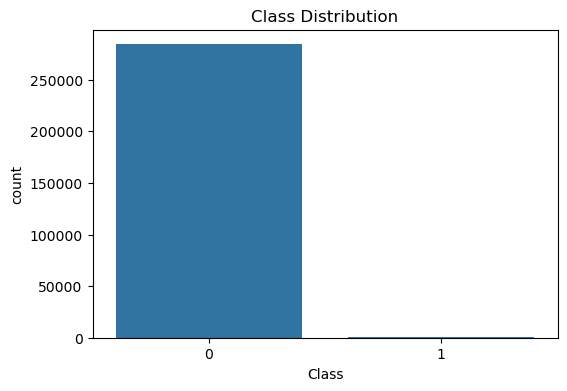

In [43]:
# Class distribution (Fraud vs Non-Fraud)
print("Class Distribution (0 = Non-Fraud, 1 = Fraud):")
print(data['Class'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

# Feature scaling for 'Amount'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Dropping the 'Time' column as it might not be relevant for Random Forest
data = data.drop(columns=['Time'])

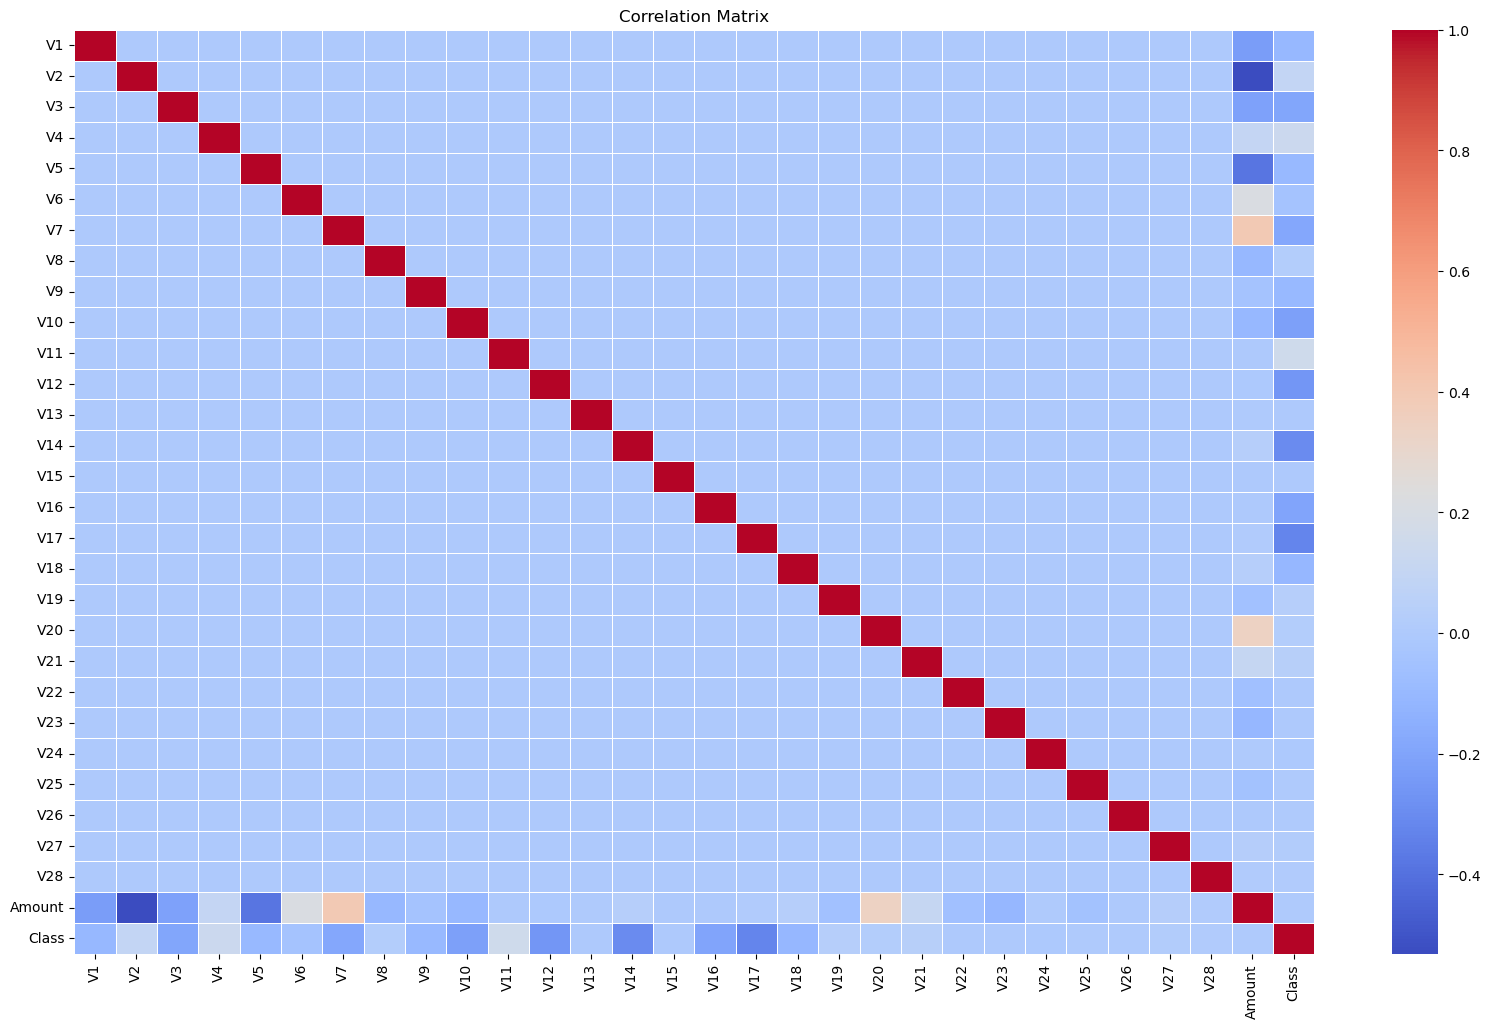

In [45]:
# Correlation matrix to understand relationships
correlation_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

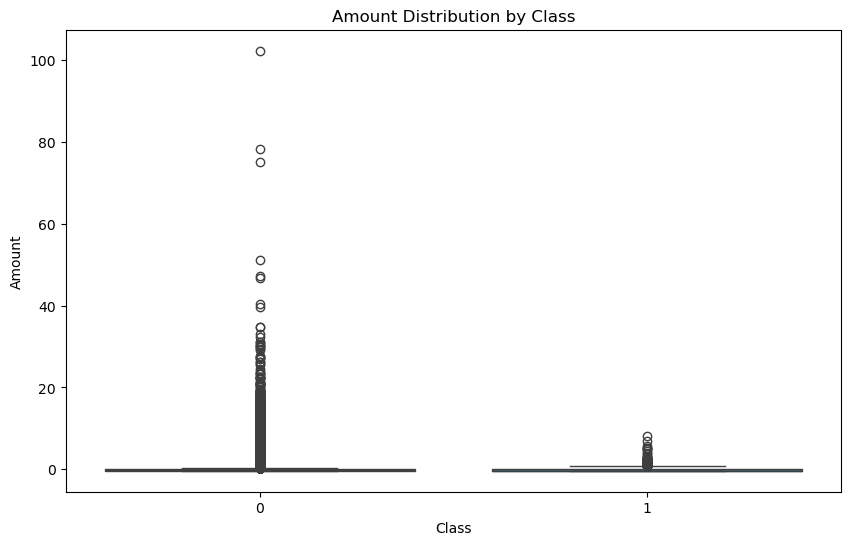


Skewness in Features:
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


In [47]:
# Boxplot to check the distribution of the 'Amount' feature by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Amount Distribution by Class")
plt.show()

# Check for skewness in features
print("\nSkewness in Features:")
print(data.skew())

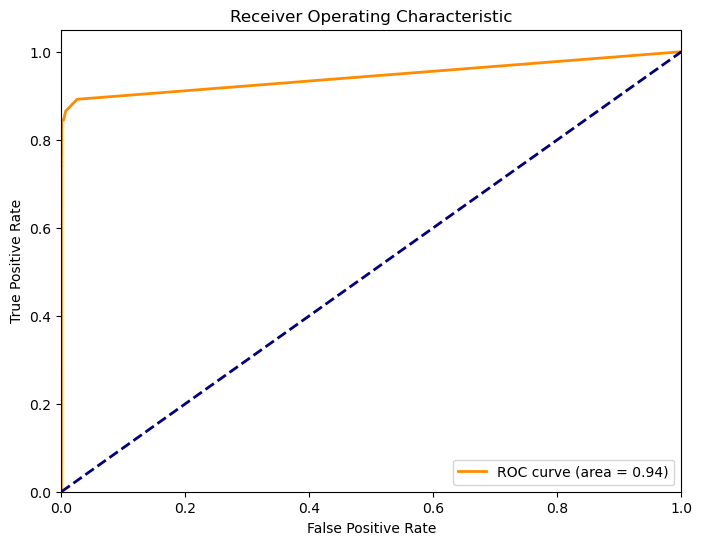

In [21]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict probabilities on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Splitting the data into features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Optional: Balancing the Dataset (if needed)
# Combine the training data back together
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the classes
fraud = train_data[train_data['Class'] == 1]
non_fraud = train_data[train_data['Class'] == 0]

# Upsample the minority class (fraud) to balance the dataset
fraud_upsampled = resample(fraud,
                           replace=True,    # Sample with replacement
                           n_samples=len(non_fraud), # Match number in majority class
                           random_state=42)

# Combine the upsampled minority class with the majority class
balanced_train_data = pd.concat([non_fraud, fraud_upsampled])

# Separate the features and target for the balanced training data
X_train_balanced = balanced_train_data.drop(columns=['Class'])
y_train_balanced = balanced_train_data['Class']

# Now the data is preprocessed and ready for training with Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Sakshi Tomar\Downloads\creditcard.csv')

# Splitting features (X) and target variable (y)
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initializing Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=40, n_jobs=-1)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Now making predictions on the data that has been tested
y_pred = rf_model.predict(X_test)

# Evaluate performance of the model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Random Forest model: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



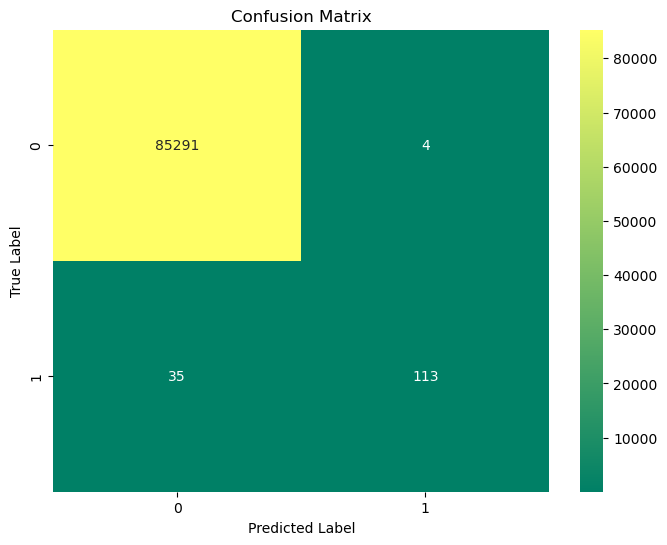

In [60]:
# Confusion matrix to see the performance on each class
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="summer", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
import joblib
# Saving the model
joblib.dump(rf_model, 'credit_card_model.pkl')

['credit_card_model.pkl']